---
title: "seaborn and matplotlib"
author: "Jungwoo Lee"
date: "2023-04-25"
categories: [code, Jupyter, python]
image: "sea.png"
---

# Seaborn
> seaborn and matplotlib 기본 코드

- Matplotlib보다 더 다양하고 고급 시각화 기능 제공
- 다양한 색상 팔레트 제공
- 통계 그래프를 쉽게 그릴 수 있도록 지원
- 데이터 시각화에 효과적인 기능 제공

# Matplotlib

- 다양한 유형의 2D 그래프 생성
- 선, 막대, 산점도 등의 그래프 스타일 지원
- 축 레이블, 제목, 범례 등의 그래프 요소 제어
- 다중 축을 사용한 복잡한 그래프 생성
- 이미지 및 애니메이션 생성 가능

## 1.1 Load data
- 예제로 사용할 펭귄 데이터를 불러옵니다.
- seaborn에 내장되어 있습니다.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## 1.2 `Figure` and `Axes`
- matplotlib으로 도화지figure를 깔고 축공간axes를 만듭니다.
- 1 x 2 축공간을 구성합니다.

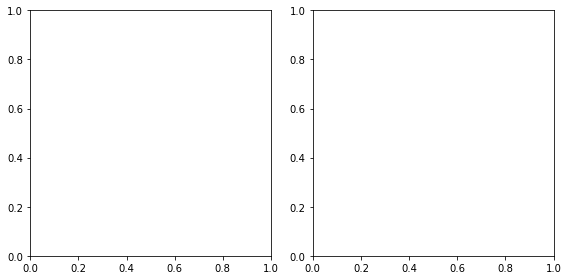

In [3]:
fig, axes = plt.subplots(ncols=2, figsize=(8,4))

fig.tight_layout()

## 1.3 plot with matplotlib
- matplotlib 기능을 이용해서 산점도를 그립니다.
  - x축은 부리 길이 bill length
  - y축은 부리 위 아래 두께 bill depth
  - 색상은 종species로 합니다.
  - Adelie, Chinstrap, Gentoo이 있습니다.
- 두 축공간 중 왼쪽에만 그립니다.   

컬러를 다르게 주기 위해 f-string 포맷을 사용했습니다.   
f-string 포맷에 대한 설명은 https://blockdmask.tistory.com/429를 참고하세요

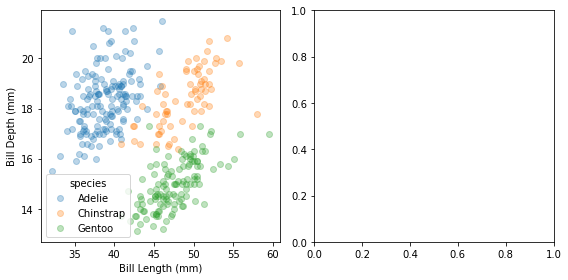

In [4]:
fig, axes = plt.subplots(ncols = 2,figsize = (8,4))

species_u = penguins["species"].unique()

for i, s in enumerate(species_u):
    axes[0].scatter(penguins["bill_length_mm"].loc[penguins["species"] == s], # 
                    penguins["bill_depth_mm"].loc[penguins["species"] == s],
                    c = f"C{i}", label = s, alpha = 0.3)
    
axes[0].legend(species_u, title = "species")
axes[0].set_xlabel("Bill Length (mm)")
axes[0].set_ylabel("Bill Depth (mm)")

# plt.show()
fig.tight_layout()

조금 더 간단히 그리는 방법   
matplotlib는 기본적으로 Categorical 변수를 color로 바로 사용하지 못함

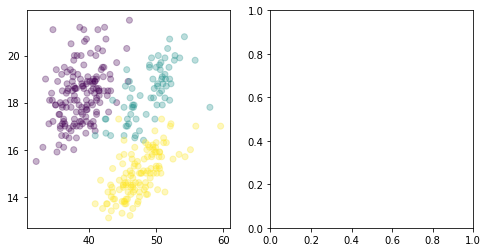

In [5]:
# We transform text categorical variables into numerical variables
penguins["species_codes"] = pd.Categorical(penguins["species"]).codes # 숫자로 바꾸고 넣어줌

fig, axes = plt.subplots(ncols = 2, figsize = (8,4))

axes[0].scatter(data = penguins, x = "bill_length_mm", y = "bill_depth_mm", c = "species_codes", alpha = 0.3)

## 1.4 Plot with seaborn

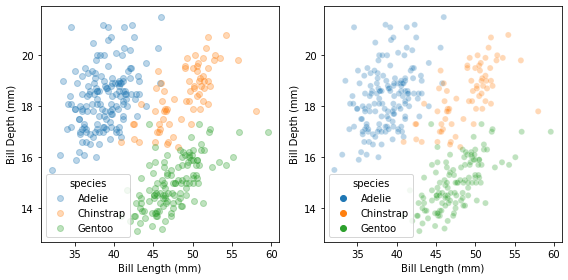

In [6]:
fig, axes = plt.subplots(ncols = 2,figsize = (8,4))

species_u = penguins["species"].unique()

# plot 0 : matplotlib

for i, s in enumerate(species_u):
    axes[0].scatter(penguins["bill_length_mm"].loc[penguins["species"] == s],
                    penguins["bill_depth_mm"].loc[penguins["species"] == s],
                    c = f"C{i}", label = s, alpha = 0.3)
    
axes[0].legend(species_u, title = "species")
axes[0].set_xlabel("Bill Length (mm)")
axes[0].set_ylabel("Bill Depth (mm)")


# plot 1 : seaborn
sns.scatterplot(x = "bill_length_mm", y = "bill_depth_mm", hue = "species", data=penguins, alpha = 0.3, ax = axes[1]) # hue = color
axes[1].set_xlabel("Bill Length (mm)")
axes[1].set_ylabel("Bill Depth (mm)")

fig.tight_layout()

- 단 세 줄로 거의 동일한 그림이 나왔습니다.
  - scatter plot의 점 크기만 살짝 작습니다.
  - label의 투명도만 살짝 다릅니다.
- seaborn 명령 scatterplot()을 그대로 사용했습니다.
- x축과 y축 label도 바꾸었습니다.
   - ax=axes[1] 인자에서 볼 수 있듯, 존재하는 axes에 그림만 얹었습니다.
   - matplotlib 틀 + seaborn 그림 이므로, matplotlib 명령이 모두 통합니다.

## 1.5 matplotlib + seaborn & seaborn + matplotlib
- matplotlib과 seaborn이 자유롭게 섞일 수 있습니다.
  - matplotlib 산점도 위에 seaborn 추세선을 얹을 수 있고,
  - seaborn 산점도 위에 matplotlib 중심점을 얹을 수 있습니다.
- 파이썬 코드는 다음과 같습니다.

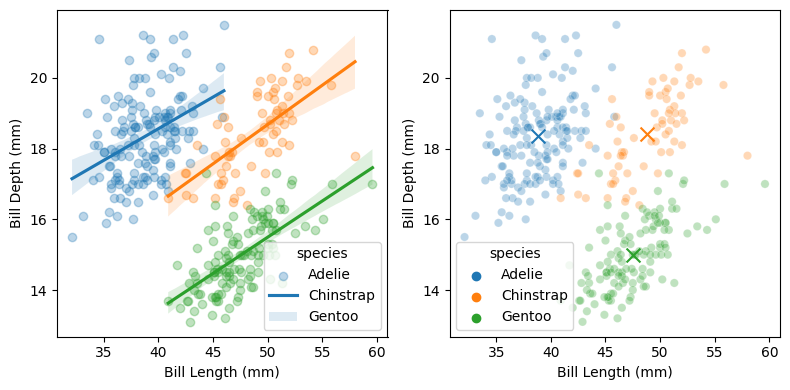

In [ ]:
fig, axes = plt.subplots(ncols = 2, figsize = (8, 4))

species_u = penguins["species"].unique()

# plot 0 : matplotlib + seaborn
for i, s in enumerate(species_u):
    # matplotlib 산점도
    axes[0].scatter(penguins["bill_length_mm"].loc[penguins["species"] == s],
                   penguins["bill_depth_mm"].loc[penguins["species"] == s],
                   c = f"C{i}", label = s, alpha = 0.3
                  )
                  
    # seaborn 추세선
    sns.regplot(x = "bill_length_mm", y = "bill_depth_mm", data = penguins.loc[penguins["species"] == s], 
                scatter = False, ax = axes[0])
    
axes[0].legend(species_u, title = "species")
axes[0].set_xlabel("Bill Length (mm)")
axes[0].set_ylabel("Bill Depth (mm)")

# plot 1 : seaborn + matplotlib
# seaborn 산점도
sns.scatterplot(x = "bill_length_mm", y = "bill_depth_mm", hue = "species", data = penguins, alpha = 0.3, ax = axes[1])
axes[1].set_xlabel("Bill Length (mm)")
axes[1].set_ylabel("Bill Depth (mm)")

for i, s in enumerate(species_u):
    # matplotlib 중심점
    axes[1].scatter(penguins["bill_length_mm"].loc[penguins["species"] == s].mean(),
                   penguins["bill_depth_mm"].loc[penguins["species"] == s].mean(),
                   c = f"C{i}", alpha = 1, marker = "x", s = 100
                  )

fig.tight_layout()

AttributeError: ignored

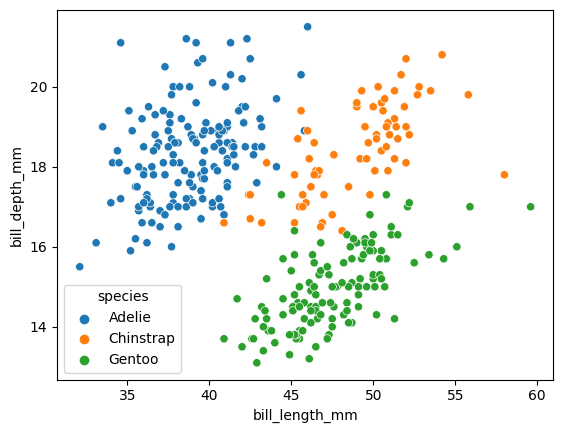

In [ ]:
sns.scatterplot(data = penguins, x = 'bill_length_mm', y = 'bill_depth_mm', hue = 'species')

mean_values = penguins.gropupby('species').mean().reset_index(drop = false)
for i, row in mean_values.iterrows():
  plt.scatter(row['bill_length_mm'], row['bill_length_mm'], marker = 'X', s = 100, linewidths = 2, edgecolors = 'black')

# set x and y axis labels
plt.xlabel('bill length (mm)')
plt.ylabel('bill depth (mm)')

plt.show()

## 1.6 seaborn + seaborn + matplotlib
- 안 될 이유가 없습니다.
- seaborn `scatterplot` + seaborn `kdeplot` + matplotlib `text`입니다

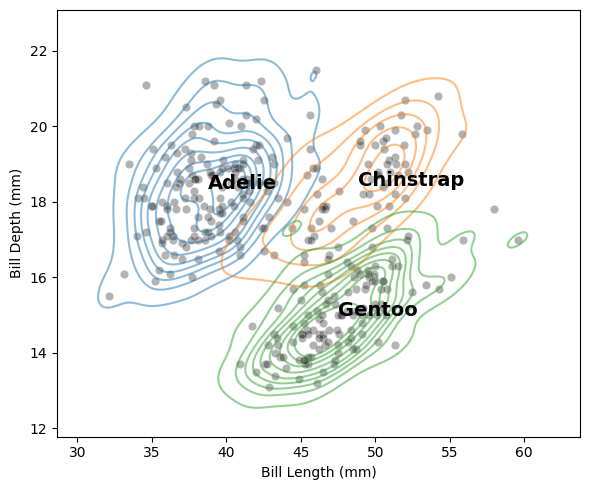

In [ ]:
fig, ax = plt.subplots(figsize=(6,5))

# plot 0: scatter plot
sns.scatterplot(x = "bill_length_mm", y = "bill_depth_mm", color = "k", data = penguins, alpha = 0.3, ax = ax, legend = False)

# plot 1: kde plot
sns.kdeplot(x = "bill_length_mm", y = "bill_depth_mm", hue = "species", data = penguins, alpha = 0.5, ax = ax, legend = False)

# text:
species_u = penguins["species"].unique()
for i, s in enumerate(species_u):
    ax.text(penguins["bill_length_mm"].loc[penguins["species"]==s].mean(),
            penguins["bill_depth_mm"].loc[penguins["species"]==s].mean(),
            s = s, fontdict={"fontsize":14, "fontweight":"bold","color":"k"}
            )

ax.set_xlabel("Bill Length (mm)")
ax.set_ylabel("Bill Depth (mm)")

fig.tight_layout()

## Quiz
Bill length를 10단위로 나눈 후, bill length에 따른 Bill depth의 boxplot을 그려봅시다.

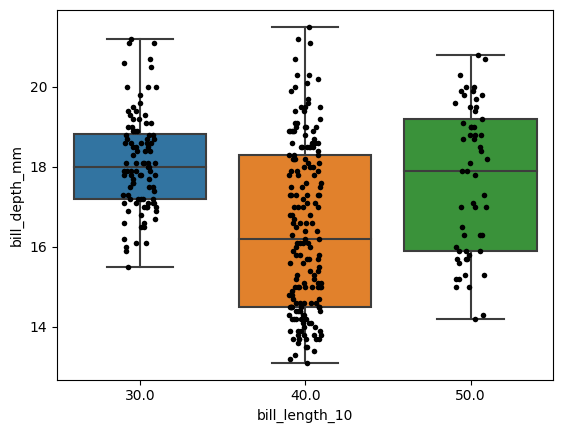

In [2]:
# bill_length_mm 변수를 10으로 나누어서 새로운 열(column)을 추가합니다.
penguins['bill_length_10'] = (penguins['bill_length_mm'] // 10) * 10 

sns.boxplot(x = 'bill_length_10', y = 'bill_depth_mm', data = penguins)
sns.stripplot(x = 'bill_length_10', y = 'bill_depth_mm', data = penguins, color = 'black', size = 4)

sns.set_style('whitegrid')
# sns.despine()

plt.show()

`pd.cut`을 이용한 방법

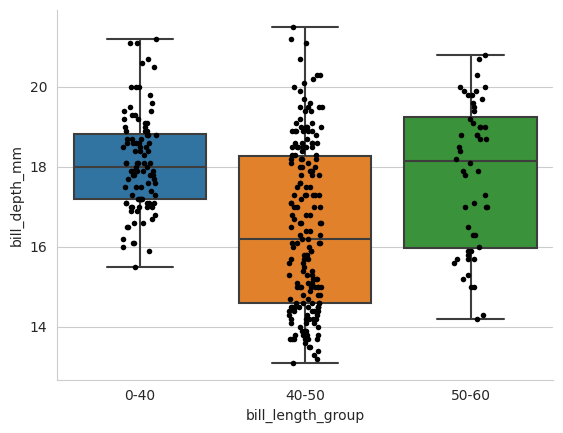

In [10]:
# bill_length_mm을 구간별로 나누어서 범주형 열을 생성합니다.
penguins['bill_length_group'] = pd.cut(penguins['bill_length_mm'],
                                       bins = [0, 40, 50, 60],
                                       labels = ['0-40', '40-50','50-60'])

sns.boxplot(x = 'bill_length_group', y = 'bill_depth_mm', data = penguins)
sns.stripplot(x = 'bill_length_group', y = 'bill_depth_mm', data = penguins, color = 'black', size = 4)

sns.set_style('whitegrid')
sns.despine()

plt.show()

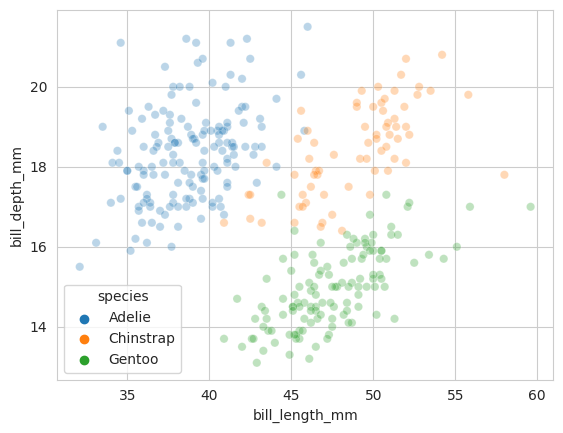

In [7]:
sns.scatterplot(x = 'bill_length_mm', y = 'bill_depth_mm', hue = 'species', data = penguins, alpha = 0.3)

plt.show()

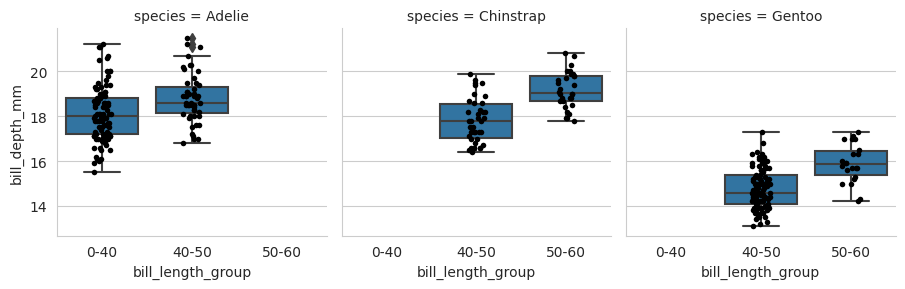

In [13]:
g = sns.FacetGrid(penguins, col = 'species', col_wrap = 4)
g.map(sns.boxplot, 'bill_length_group', 'bill_depth_mm',order = ['0-40', '40-50','50-60'])
g.map(sns.stripplot, 'bill_length_group', 'bill_depth_mm',  color = 'black', size = 4, order = ['0-40', '40-50','50-60'])

sns.set_style('whitegrid')
sns.despine()

plt.show()

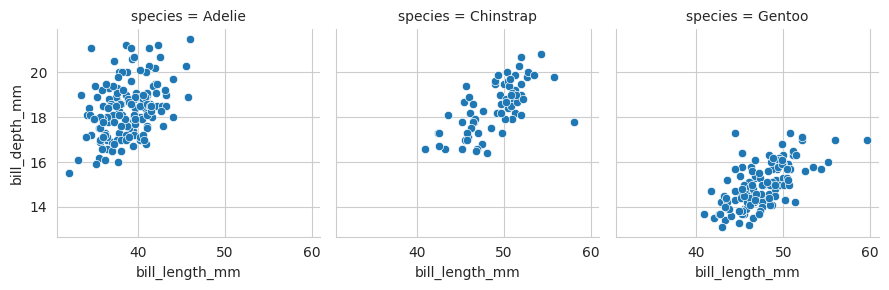

In [14]:
g = sns.FacetGrid(penguins, col = 'species', col_wrap = 3)
g.map(sns.scatterplot, 'bill_length_mm', 'bill_depth_mm')

sns.set_style('whitegrid')
sns.despine()

plt.show()

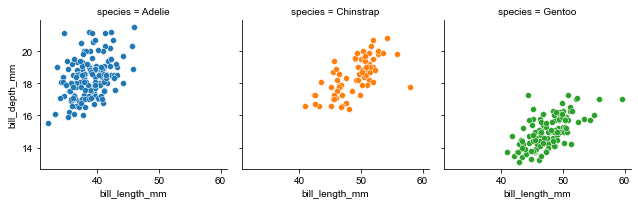

In [7]:
g = sns.FacetGrid(penguins, col = 'species', col_wrap = 3, hue = 'species')
g.map(sns.scatterplot, 'bill_length_mm', 'bill_depth_mm')

sns.set_style('whitegrid')
sns.despine()

plt.show()